In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv(r"C:\Users\Administrator\Desktop\data visualization\archive\tmdb_5000_movies.csv")



In [2]:
df.head


<bound method NDFrame.head of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   1999

In [3]:
df.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
df= df[['budget', 'genres', #'homepage', 'id', 'keywords',      #dropping unwanted columns 
        'original_language',
       #'original_title', 'overview',
        'popularity', # 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       #'spoken_languages', #'status','tagline',
        'title',
        'vote_average',
       'vote_count']].copy()

In [5]:
df.columns


Index(['budget', 'genres', 'original_language', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
df.isna().sum()


budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

In [7]:
# Drop row with missing release_date             
df = df.dropna(subset=['release_date'])

# Fill missing runtime with median
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')       # extracts the year from and creates a whole other column for year alone 
df['release_year'] = df['release_date'].dt.year





In [8]:
df = df.drop(columns = [ 'release_date'] , axis = 1 ).copy()

In [9]:
# extract genre names        #cleanes genre column and overwrites it 
import ast

# Convert stringified list of dicts into actual list of dicts
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notnull(x) and x != '' else [])


In [10]:
import ast         

# Convert stringified list of dictionaries into actual list of dictionaries and extract country names
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notnull(x) and x != '' else [])


In [11]:
df.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_countries', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'release_year'],
      dtype='object')

In [13]:
df.shape

(4802, 11)

In [21]:
df.head


<bound method NDFrame.head of          budget                                         genres  \
0     237000000  [Action, Adventure, Fantasy, Science Fiction]   
1     300000000                   [Adventure, Fantasy, Action]   
2     245000000                     [Action, Adventure, Crime]   
3     250000000               [Action, Crime, Drama, Thriller]   
4     260000000           [Action, Adventure, Science Fiction]   
...         ...                                            ...   
4798     220000                      [Action, Crime, Thriller]   
4799       9000                              [Comedy, Romance]   
4800          0             [Comedy, Drama, Romance, TV Movie]   
4801          0                                             []   
4802          0                                  [Documentary]   

     original_language  popularity  \
0                   en  150.437577   
1                   en  139.082615   
2                   en  107.376788   
3                   en  1

In [22]:
# Check for duplicate rows based on specific columns
duplicate_rows = df[df.duplicated(subset=['budget',  'original_language', 'popularity',
        'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'release_year'])]

# See how many duplicates there are
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Preview them
duplicate_rows.head()


Number of duplicate rows: 0


,budget,genres,original_language,popularity,production_countries,revenue,runtime,title,vote_average,vote_count,release_year


In [24]:
import pandas as pd

def check_outliers_iqr_all(df, columns):
    outliers_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers in the current column
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Save summary statistics in a dictionary
        outliers_summary[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': outliers.shape[0]
        }
        
        # Print the results for this column
        print(f"Column: {col}")
        print(f"  Lower bound: {lower_bound}")
        print(f"  Upper bound: {upper_bound}")
        print(f"  Number of outliers: {outliers.shape[0]}\n")
        
    return outliers_summary

# Your list of numerical columns
numerical_columns = ['popularity', 'runtime', 'revenue', 'vote_count']

# Call the function to check for outliers in these columns
outliers_summary = check_outliers_iqr_all(df, numerical_columns)


Column: popularity
  Lower bound: -30.818690125000003
  Upper bound: 63.822440875000005
  Number of outliers: 275

Column: runtime
  Lower bound: 58.375
  Upper bound: 153.375
  Number of outliers: 193

Column: revenue
  Lower bound: -139378792.5
  Upper bound: 232297987.5
  Number of outliers: 472

Column: vote_count
  Lower bound: -970.5
  Upper bound: 1761.5
  Number of outliers: 504



In [25]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows for the current column that lie within the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Your list of numerical columns
numerical_columns = ['popularity', 'runtime', 'revenue', 'vote_count']

# Apply the function and overwrite df
df = remove_outliers_iqr(df, numerical_columns)

# Check the shape after removal
print(f"Shape after removing outliers: {df.shape}")



Shape after removing outliers: (3669, 11)


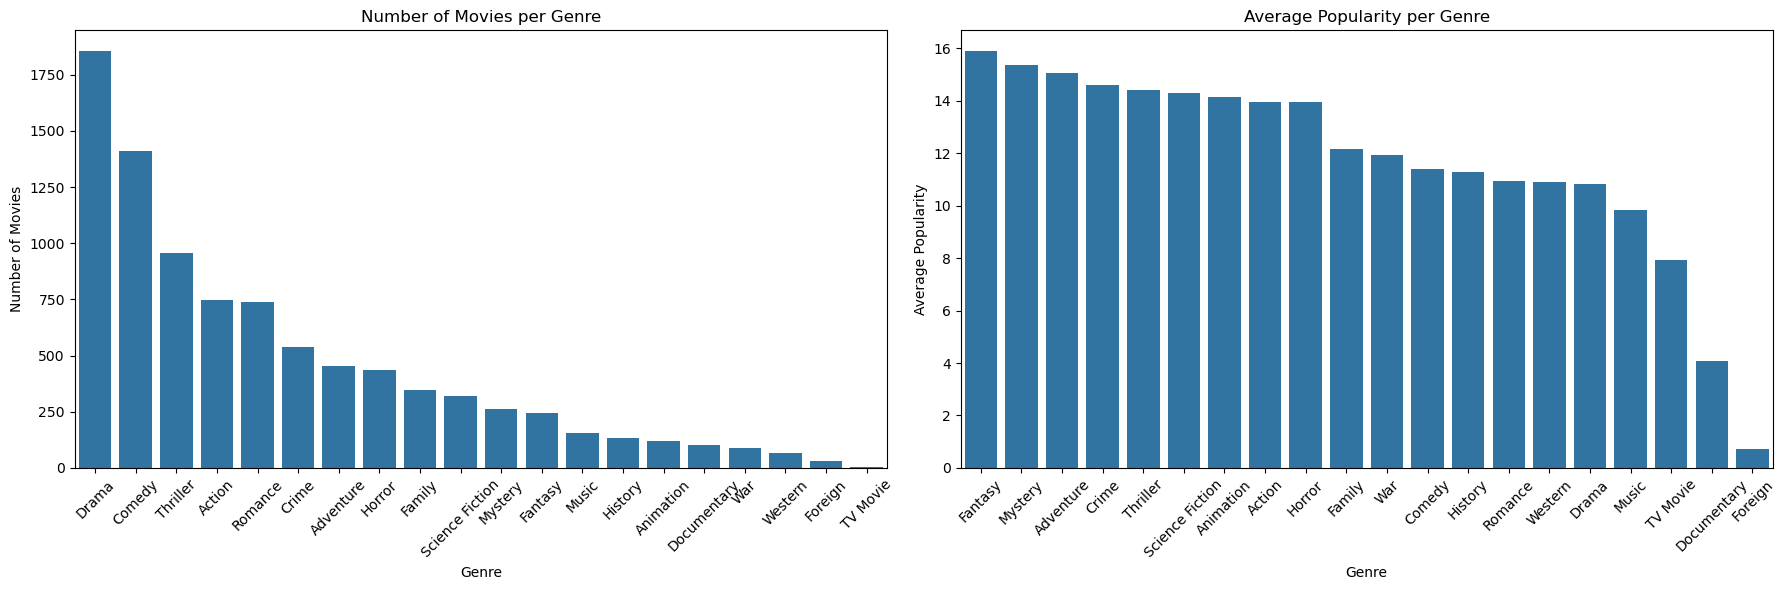

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explode the 'genres' list to have one genre per row
df_exploded = df.explode('genres')

# Calculate the number of movies per genre
genre_counts = df_exploded['genres'].value_counts()

# Calculate the average popularity per genre
genre_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the number of movies per genre
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[0])
axes[0].set_title('Number of Movies per Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Movies')
axes[0].tick_params(axis='x', rotation=45)

# Plot the average popularity per genre
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, ax=axes[1])
axes[1].set_title('Average Popularity per Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average Popularity')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


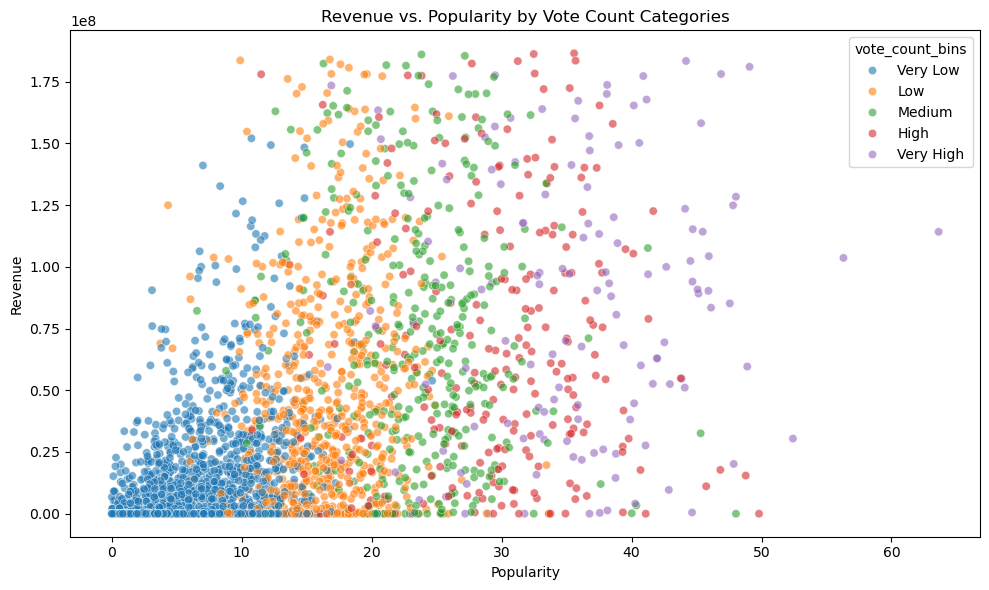

In [34]:
import pandas as pd

# Create bins for vote_count
df['vote_count_bins'] = pd.cut(df['vote_count'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='popularity', y='revenue', hue='vote_count_bins', alpha=0.6)
plt.title('Revenue vs. Popularity by Vote Count Categories')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


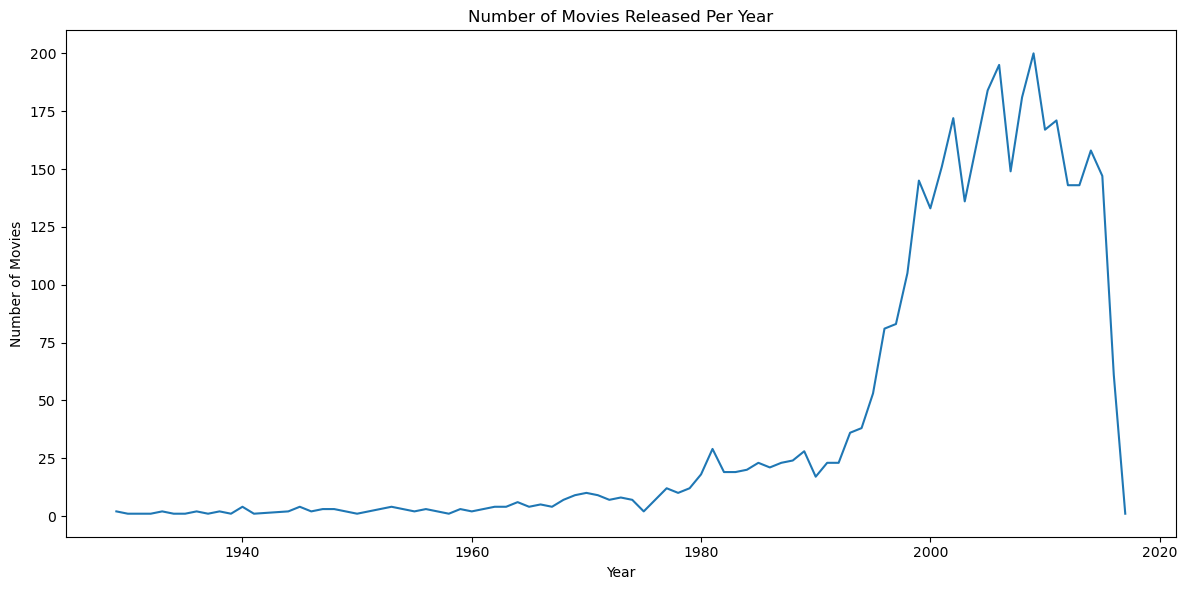

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of movies released each year
movies_per_year = df['release_year'].value_counts().sort_index()

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)

# Set plot title and labels
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


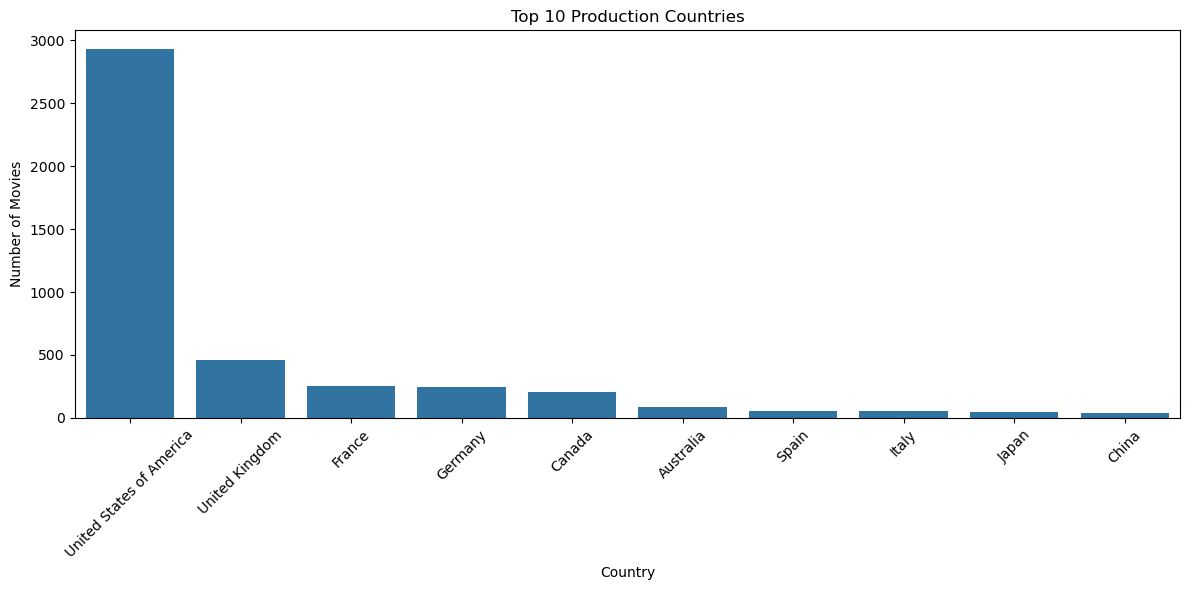

In [36]:
#top production countries 
# Explode the 'production_countries' list to have one country per row
df_exploded = df.explode('production_countries')
country_counts = df_exploded['production_countries'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Production Countries')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


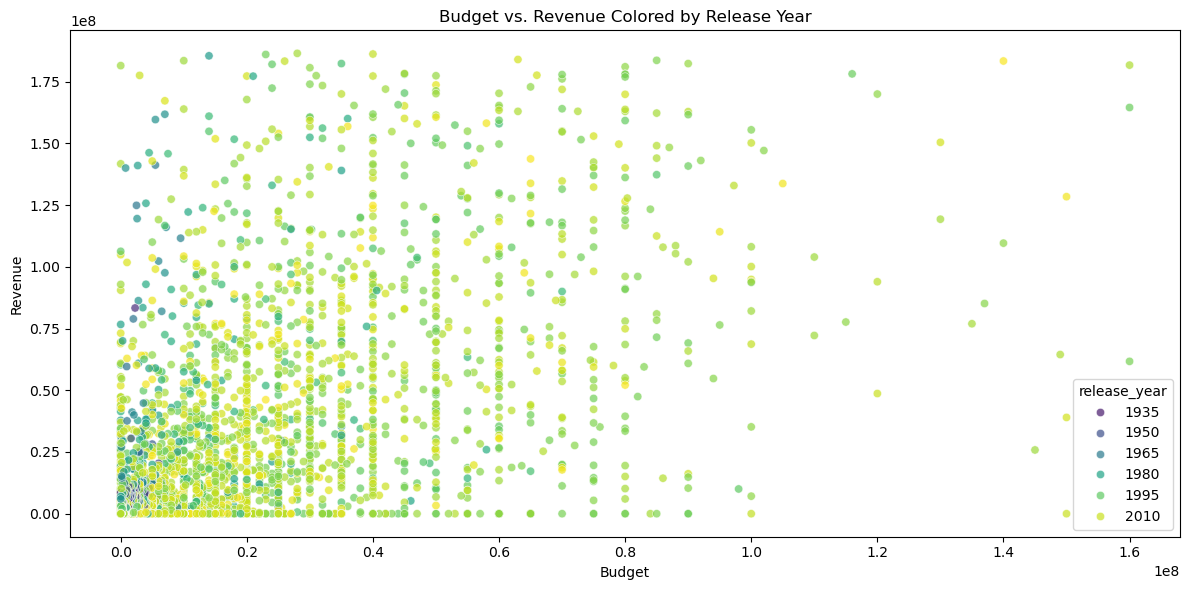

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(12, 6))

# Create a scatter plot with hue based on release_year
sns.scatterplot(
    data=df,
    x='budget',
    y='revenue',
    hue='release_year',  # Use 'release_year' for color encoding
    palette='viridis',   # Choose a color palette
    alpha=0.7            # Set transparency for better visibility
)

# Set plot title and labels
plt.title('Budget vs. Revenue Colored by Release Year')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



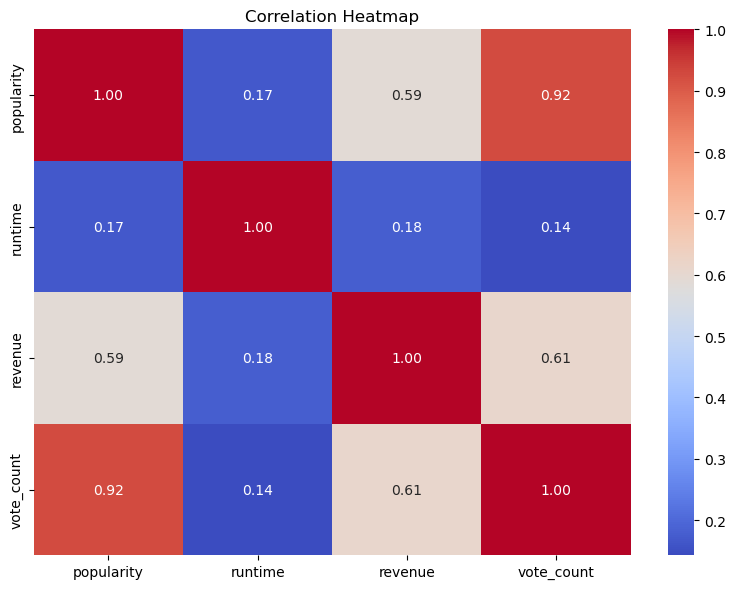

In [38]:
#correlation heatmap for numerical feautures
numerical_cols = ['popularity', 'runtime', 'revenue', 'vote_count']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [39]:
from sklearn.preprocessing import MultiLabelBinarizer       #encoding country names 
import pandas as pd
import ast

# Initialize the encoder
mlb = MultiLabelBinarizer()

# Fit and transform the column
country_dummies = pd.DataFrame(mlb.fit_transform(df['production_countries']),
                               columns=mlb.classes_,
                               index=df.index)

# Join the encoded columns to your main DataFrame
df = pd.concat([df.drop(columns='production_countries'), country_dummies], axis=1)


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer              #encoding genres column

# Initialize the binarizer
mlb = MultiLabelBinarizer()

# Fit and transform the genres colum
genres_encoded = mlb.fit_transform(df['genres'])

# Create a new DataFrame with the genre names as columns
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)

# Concatenate the encoded genres with the original dataframe
df = pd.concat([df, genres_df], axis=1)

# Drop the original 'genres' column
df.drop(columns='genres', inplace=True)


In [41]:
from sklearn.preprocessing import LabelEncoder                    #label encoding for languages

le = LabelEncoder()
df['original_language_encoded'] = le.fit_transform(df['original_language'])


In [42]:
#scaling numerical features 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List the numerical columns to scale
numerical_columns = ['popularity', 'runtime', 'revenue', 'vote_count']

# Fit and transform the numerical features using StandardScaler
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the changes
print(df[numerical_columns].head())


     popularity   runtime   revenue  vote_count
83    -0.924620  0.376298 -0.669063   -0.796136
97    -0.238551  1.115504  1.157996   -0.380434
104    0.894463 -0.295708  3.641724    1.297632
135    0.902318 -0.094106 -0.669063    1.167963
141    0.041924 -1.034915  0.256158   -0.166862


In [43]:
df.columns.tolist()

['budget',
 'original_language',
 'popularity',
 'revenue',
 'runtime',
 'title',
 'vote_average',
 'vote_count',
 'release_year',
 'vote_count_bins',
 'Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guadaloupe',
 'Guyana',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Malta',
 'Mexico',
 'Monaco',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Serbia'

In [44]:
df.shape

(3669, 116)

In [45]:
import pandas as pd                                  #genre prediction model 1
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, hamming_loss, f1_score
import matplotlib.pyplot as plt

# === Setup ===
genre_columns = [
    'Drama', 'TV Movie', 'War', 'History', 'Foreign', 'Family', 'Romance', 'Music', 
    'Thriller', 'Mystery', 'Documentary', 'Adventure', 'Animation', 'Western', 
    'Horror', 'Comedy', 'Science Fiction', 'Fantasy', 'Crime', 'Action'
]

features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
X = df[features]
y = df[genre_columns]

# === Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Base Model with Class Weights for Imbalance ===
base_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
chain_model = ClassifierChain(base_rf)
chain_model.fit(X_train, y_train)

# === Predict Probabilities (instead of hard 0/1) ===
y_probs = chain_model.predict_proba(X_test)

# === Threshold Tuning ===
threshold = 0.3  # Lower threshold helps catch rare genres
y_pred = (y_probs >= threshold).astype(int)

# === Evaluation ===
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=genre_columns, zero_division=0))

print(f"✅ Subset Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"⚠️  Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
print(f"📈 Micro F1 Score: {f1_score(y_test, y_pred, average='micro'):.4f}")
print(f"📊 Macro F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

# === Feature Importance Plot ===
try:
    importances = chain_model.base_estimator_.feature_importances_
    plt.barh(features, importances)
    plt.xlabel("Feature Importance")
    plt.title("Random Forest Feature Importance")
    plt.show()
except:
    print("Feature importances not available.")


🔍 Classification Report:
                 precision    recall  f1-score   support

          Drama       0.62      0.89      0.73       374
       TV Movie       0.00      0.00      0.00         1
            War       0.33      0.05      0.09        19
        History       0.17      0.03      0.05        31
        Foreign       0.25      0.14      0.18         7
         Family       0.40      0.22      0.28        79
        Romance       0.24      0.29      0.26       154
          Music       0.00      0.00      0.00        30
       Thriller       0.33      0.67      0.44       190
        Mystery       0.17      0.07      0.10        60
    Documentary       0.04      0.06      0.05        18
      Adventure       0.30      0.28      0.29        92
      Animation       0.60      0.29      0.39        21
        Western       0.00      0.00      0.00        13
         Horror       0.29      0.38      0.33        88
         Comedy       0.44      0.68      0.54       277
Scien

In [47]:
from sklearn.multioutput import MultiOutputClassifier     #genres predicting cod3e 2 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate genre labels
genre_columns = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Thriller']  # use your actual genres
y_genres = df[genre_columns]

# Reuse X (features) from earlier, or redefine if needed
X = df.drop(columns=['vote_average'] + genre_columns).select_dtypes(include=[np.number])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_genres, test_size=0.2, random_state=42)

# Multi-label classifier
genre_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
genre_model.fit(X_train, y_train)

# Predictions
y_pred = genre_model.predict(X_test)

# Evaluation (optional: per label)
for i, genre in enumerate(genre_columns):
    print(f"\nGenre: {genre}")
    print(classification_report(y_test[genre], y_pred[:, i]))


Genre: Action
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       599
           1       0.46      0.22      0.30       135

    accuracy                           0.81       734
   macro avg       0.65      0.58      0.59       734
weighted avg       0.77      0.81      0.78       734


Genre: Adventure
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       642
           1       0.58      0.16      0.25        92

    accuracy                           0.88       734
   macro avg       0.73      0.57      0.59       734
weighted avg       0.85      0.88      0.85       734


Genre: Comedy
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       457
           1       0.62      0.47      0.53       277

    accuracy                           0.69       734
   macro avg       0.67      0.65      0.65       734
weighted avg       0.68   

In [76]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame 'df' has the genre columns as 'Action', 'Adventure', etc.
genre_columns = ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Thriller']  # use your actual genres
y_genres = df[genre_columns]

# Features (using numeric columns only, excluding vote_average and genre_columns)
X = df.drop(columns=['vote_average'] + genre_columns).select_dtypes(include=[np.number])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_genres, test_size=0.2, random_state=42)

# Multi-label classifier (Random Forest)
genre_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
genre_model.fit(X_train, y_train)

# Predictions
y_pred = genre_model.predict(X_test)

# 1. Subset Accuracy (Exact Match Ratio)
subset_accuracy = np.mean(np.all(y_pred == y_test.values, axis=1))
print("Subset Accuracy (Exact Match Ratio):", subset_accuracy)

# 2. Per-Genre Accuracy
for i, genre in enumerate(genre_columns):
    accuracy_per_genre = accuracy_score(y_test[genre], y_pred[:, i])
    print(f"Accuracy for {genre}: {accuracy_per_genre}")

# 3. Overall Accuracy across all genres (average of per-genre accuracy)
overall_accuracy = np.mean([accuracy_score(y_test[genre], y_pred[:, i]) for i, genre in enumerate(genre_columns)])
print("\nOverall Accuracy across all genres (average):", overall_accuracy)

# Optional: Classification Report for each genre
for i, genre in enumerate(genre_columns):
    print(f"\nClassification Report for {genre}:")
    print(classification_report(y_test[genre], y_pred[:, i]))

Subset Accuracy (Exact Match Ratio): 0.20844686648501362
Accuracy for Action: 0.8092643051771117
Accuracy for Adventure: 0.8801089918256131
Accuracy for Comedy: 0.6907356948228883
Accuracy for Drama: 0.715258855585831
Accuracy for Fantasy: 0.9264305177111717
Accuracy for Horror: 0.8910081743869209
Accuracy for Romance: 0.7901907356948229
Accuracy for Thriller: 0.7997275204359673

Overall Accuracy across all genres (average): 0.812840599455041

Classification Report for Action:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       599
           1       0.46      0.22      0.30       135

    accuracy                           0.81       734
   macro avg       0.65      0.58      0.59       734
weighted avg       0.77      0.81      0.78       734


Classification Report for Adventure:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       642
           1       0.58      0.16      0.25 

RMSE: 0.7124654961997945
R² Score: 0.5616362256841372


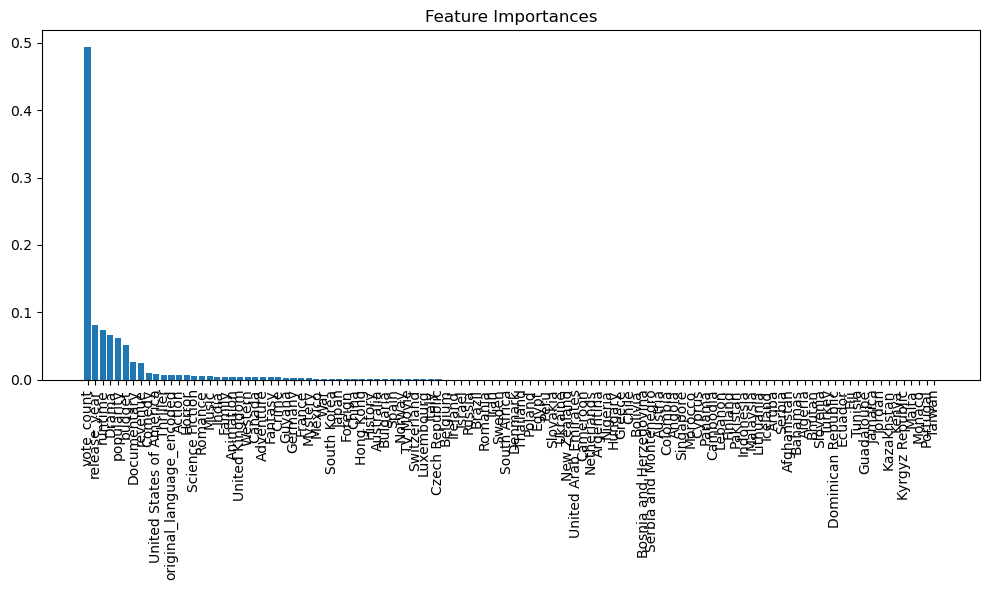

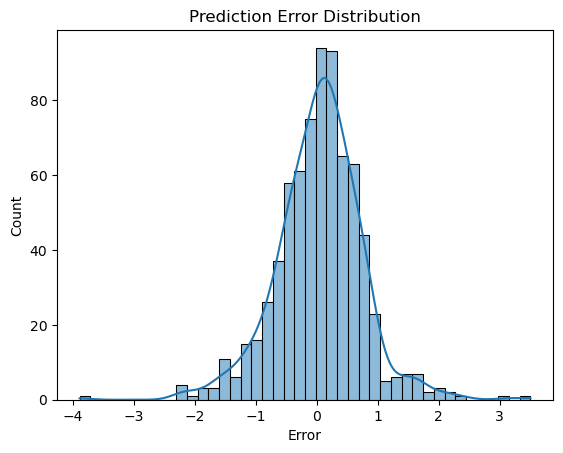

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV     #rating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Features and target
X = df.drop(columns=['vote_average'])  # Drop only the target
X = X.select_dtypes(include=[np.number])  # Use only numeric columns
y = df['vote_average']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, 
                    cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
model_rating = grid.best_estimator_

# Predict
preds = model_rating.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print("RMSE:", rmse)
print("R² Score:", r2)

# Feature importances
importances = model_rating.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Error distribution
errors = y_test - preds
sns.histplot(errors, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.show()



In [50]:
from sklearn.ensemble import RandomForestRegressor               #hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define a smaller, focused search space
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # Avoid 'auto' (deprecated in recent sklearn)
}

# Model
rf = RandomForestRegressor(random_state=42)

# Faster Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          # Fewer combinations to test
    cv=3,               # Less cross-validation folds
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit and evaluate
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

preds = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("✅ Best Params (fast tuning):", random_search.best_params_)
print("📉 RMSE:", rmse)
print("📈 R² Score:", r2)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params (fast tuning): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
📉 RMSE: 0.7290040629080683
📈 R² Score: 0.5410484072946605


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'vote_average' is the target variable

# Separate features and target
X = df.drop(columns=['vote_average'])
y = df['vote_average']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that combines the preprocessor with the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict on the test data
preds = model_pipeline.predict(X_test)


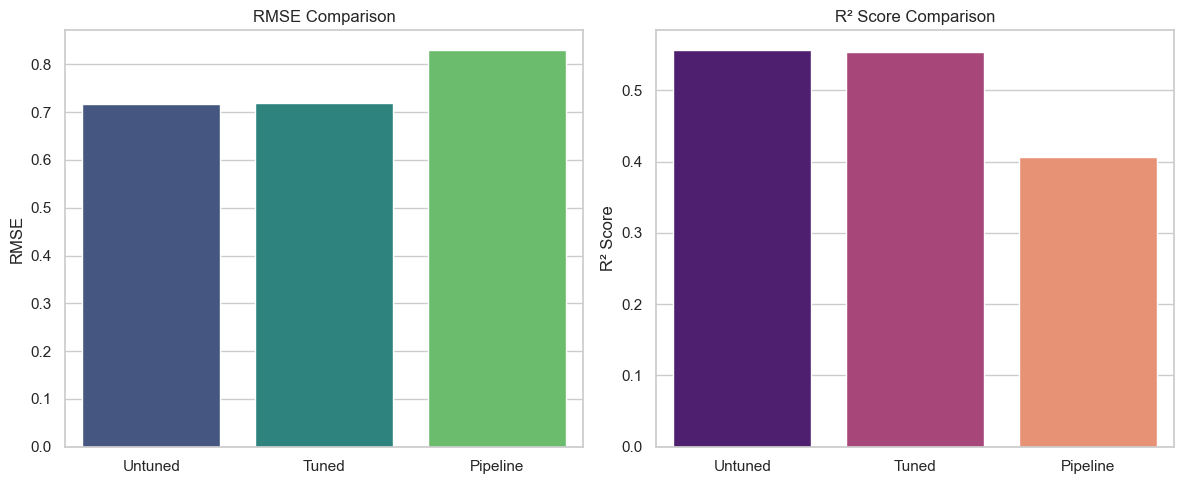

✅ Untuned Model RMSE: 0.7168968123164845
✅ Untuned Model R²: 0.5561662922401207
✅ Tuned Model RMSE: 0.7188219291749771
✅ Tuned Model R²: 0.5537793964932259
✅ Pipeline Model RMSE: 0.8295523734683515
✅ Pipeline Model R²: 0.40571522483545597


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'vote_average' is the target variable
# Features and target
X = df.drop(columns=['vote_average'])  # Drop only the target
X = X.select_dtypes(include=[np.number])  # Use only numeric columns
y = df['vote_average']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Untuned Model
model_untuned = RandomForestRegressor(random_state=42)
model_untuned.fit(X_train, y_train)
preds_untuned = model_untuned.predict(X_test)
rmse_untuned = np.sqrt(mean_squared_error(y_test, preds_untuned))
r2_untuned = r2_score(y_test, preds_untuned)

# Tuned Model (Simple Tuning Example)
model_tuned = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model_tuned.fit(X_train, y_train)
preds_tuned = model_tuned.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, preds_tuned))
r2_tuned = r2_score(y_test, preds_tuned)

# Pipeline Model with Preprocessing
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that combines the preprocessor with the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Predict on the test data
preds_pipeline = model_pipeline.predict(X_test)
rmse_pipeline = np.sqrt(mean_squared_error(y_test, preds_pipeline))
r2_pipeline = r2_score(y_test, preds_pipeline)

# ---- 1. Performance Comparison ----
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# RMSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=['Untuned', 'Tuned', 'Pipeline'], y=[rmse_untuned, rmse_tuned, rmse_pipeline], hue=['Untuned', 'Tuned', 'Pipeline'], palette='viridis', legend=False)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# R² Score Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=['Untuned', 'Tuned', 'Pipeline'], y=[r2_untuned, r2_tuned, r2_pipeline], hue=['Untuned', 'Tuned', 'Pipeline'], palette='magma', legend=False)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Print evaluation results
print("✅ Untuned Model RMSE:", rmse_untuned)
print("✅ Untuned Model R²:", r2_untuned)
print("✅ Tuned Model RMSE:", rmse_tuned)
print("✅ Tuned Model R²:", r2_tuned)
print("✅ Pipeline Model RMSE:", rmse_pipeline)
print("✅ Pipeline Model R²:", r2_pipeline)

